In [ ]:
"Hello"

'Hello'

In [ ]:
"practice"

'practice'

In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/Parkss0/251119/0d54ee6950128c492f38bf87a13c98addeae0e09/df5_export3.csv"

df5 = pd.read_csv(url)
print(df5.shape)
df5.head()


(9393, 99)


,chembl_id,canonical_smiles,alogp,molecular_weight,hba,hbd,psa,rtb,qed_weighted,num_ro5_violations,...,qed_rdkit,fsp3,num_chiral_centers,aromatic_atom_fraction,ro3_pass,leadlike_oprea_pass,druglike_dsx_pass,rdmol,sa_score,np_likeness
0,CHEMBL2,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,1.78,383.41,8,1,106.95,4,0.73,0,...,0.726562,0.315789,0,0.535714,0,1,1,<rdkit.Chem.rdchem.Mol object at 0x000001D9910...,2.302066,-1.294172
1,CHEMBL3,CN1CCC[C@H]1c1cccnc1,1.85,162.24,2,0,16.13,1,0.63,0,...,0.626152,0.500000,1,0.500000,1,0,1,<rdkit.Chem.rdchem.Mol object at 0x000001D9910...,2.499926,-0.412007
2,CHEMBL6200,c1cncc([C@@H]2CCCN2)c1,1.51,148.21,2,1,24.92,1,0.65,0,...,0.652566,0.444444,1,0.545455,1,0,1,<rdkit.Chem.rdchem.Mol object at 0x000001D9910...,2.697824,-0.092102
3,CHEMBL4,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,1.54,361.37,6,1,75.01,2,0.87,0,...,0.874740,0.444444,1,0.384615,0,1,1,<rdkit.Chem.rdchem.Mol object at 0x000001D9910...,3.097642,-0.211796
4,CHEMBL5,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21,1.42,232.24,4,1,72.19,2,0.85,0,...,0.849524,0.250000,0,0.588235,0,1,1,<rdkit.Chem.rdchem.Mol object at 0x000001D9910...,2.150688,-0.977981


In [15]:
import pandas as pd

# df5가 이미 메모리에 있다고 가정
df = df5.copy()

# 1) phase1_label 생성 (없으면)
if "phase1_label" not in df.columns:
    df["phase1_label"] = (df["max_phase"] <= 1).astype(int)

# 2) Chemprop가 쓸 컬럼만 선택
df_cp = df[["canonical_smiles", "phase1_label"]].dropna().copy()
df_cp = df_cp.rename(columns={
    "canonical_smiles": "smiles",
    "phase1_label": "y",          # Chemprop target column 이름
})

print("Chemprop용 샘플 수:", len(df_cp))
print(df_cp["y"].value_counts(normalize=True).rename("ratio"))

# 3) CSV로 저장
df_cp.to_csv("chemprop_phase1.csv", index=False)
print("Saved: chemprop_phase1.csv")


Chemprop용 샘플 수: 9393
y
0    0.904716
1    0.095284
Name: ratio, dtype: float64
Saved: chemprop_phase1.csv


In [3]:
import chemprop, sys
print("chemprop version:", chemprop.__version__)
print("python exe:", sys.executable)


ModuleNotFoundError: No module named 'chemprop'

In [5]:
!pip install chemprop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 96.4 MB/s eta 0:00:00


In [6]:
!chemprop train \
  -i chemprop_phase1.csv \
  -t classification \
  --smiles-columns smiles \
  --target-columns y \
  --split SCAFFOLD_BALANCED \
  --split-sizes 0.8 0.1 0.1 \
  --metrics prc \
  --epochs 50 \
  --class-balance \
  -o chemprop_phase1_model


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 28/49 ╸━━━━━━━━━━━━━━━━ 1/22 0:00:00 • -:--:-- 0.00it/s v_num: 0.000      
                                                              train_loss_step:  
                                                              0.458 val_loss:   
                                                              0.511             
                                                              train_loss_epoch: 
Epoch 28/49 ━╸━━━━━━━━━━━━━━━ 2/22 0:00:00 • 0:00:01 98.25it/s v_num: 0.000     
                                                               train_loss_step: 
                                                               0.482 val_loss:  
                                                               0.511            
                                                               train_loss_epoch:
Epoch 28/49 ━━╺━━━━━━━━━━━━━━ 3/22 0:00:00 • 0:00:01 96.87it/s v_num: 0.000     
                                                               train_loss

In [7]:
import os

print("CWD:", os.getcwd())
print("Top-level:", os.listdir("."))

print("\nchemprop_phase1_model 안:")
print(os.listdir("chemprop_phase1_model"))

print("\nmodel_0 안:")
print(os.listdir("chemprop_phase1_model/model_0"))


CWD: /content
Top-level: ['.config', 'chemprop_phase1.csv', 'chemprop_phase1_model', 'sample_data']

chemprop_phase1_model 안:
['model_0', 'config.toml']

model_0 안:
['trainer_logs', 'checkpoints']


In [11]:
import os, glob

print("CWD:", os.getcwd())
print("model_0/checkpoints 안:")
print(os.listdir("chemprop_phase1_model/model_0/checkpoints"))

ckpts = glob.glob("chemprop_phase1_model/model_0/checkpoints/*.ckpt")
print("\n찾은 ckpt 파일들:")
for c in ckpts:
    print(" -", c)


CWD: /content
model_0/checkpoints 안:
['best-epoch=25-val_loss=0.42.ckpt', 'last.ckpt']

찾은 ckpt 파일들:
 - chemprop_phase1_model/model_0/checkpoints/best-epoch=25-val_loss=0.42.ckpt
 - chemprop_phase1_model/model_0/checkpoints/last.ckpt


In [8]:
!chemprop predict \
  -i chemprop_phase1.csv \
  -t classification \
  --smiles-columns smiles \
  --model-paths chemprop_phase1_model/model_0/best.pt \
  -o chemprop_phase1_preds.csv


usage: chemprop [-h] {train,predict,convert,fingerprint,hpopt} ...
chemprop: error: unrecognized arguments: -t classification


In [9]:
import glob, os

print("현재 폴더:", os.getcwd())
print("생성된 예측 파일들:")
for f in glob.glob("chemprop_phase1_preds*.csv"):
    print(" -", f)


현재 폴더: /content
생성된 예측 파일들:


In [10]:
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score

# 예측 CSV 찾기
import glob
pred_path = glob.glob("chemprop_phase1_preds*.csv")[0]
print("사용할 예측 파일:", pred_path)

df_pred = pd.read_csv(pred_path)
print(df_pred.head())
print(df_pred.columns)


IndexError: list index out of range

In [ ]:
y_true = df_pred["y"].values          # Phase≤1 (1) / Phase≥2 (0)
y_score = df_pred["pred_0"].values    # Phase≤1 예측 확률

roc = roc_auc_score(y_true, y_score)
ap  = average_precision_score(y_true, y_score)

print(f"Chemprop ROC-AUC : {roc:.3f}")
print(f"Chemprop PR-AUC  : {ap:.3f}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

fpr, tpr, _ = roc_curve(y_true, y_score)
prec, rec, _ = precision_recall_curve(y_true, y_score)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Chemprop (AUC={roc:.3f})")
plt.plot([0,1],[0,1],"--",color="gray",label="random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Chemprop ROC curve – Phase≤1 vs Phase≥2")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f"Chemprop (AP={ap:.3f})")
plt.hlines(y_true.mean(), 0, 1, linestyles="--", color="gray",
           label=f"baseline (pos rate={y_true.mean():.3f})")
plt.xlabel("Recall (Phase≤1)")
plt.ylabel("Precision (Phase≤1)")
plt.title("Chemprop Precision–Recall curve – Phase≤1 positive")
plt.legend()
plt.tight_layout()
plt.show()


# Chemprop 체크

In [12]:
!pip install chemprop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 91.1 MB/s eta 0:00:00


In [16]:
!chemprop train \
  -i chemprop_phase1.csv \
  -t classification \
  --smiles-columns smiles \
  --target-columns y \
  --split SCAFFOLD_BALANCED \
  --split-sizes 0.8 0.1 0.1 \
  --metrics prc \
  --epochs 50 \
  --class-balance \
  -o chemprop_phase1_model


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
                                                              train_loss_step:  
                                                              0.510 val_loss:   
                                                              0.509             
                                                              train_loss_epoch: 
Epoch 28/49 ╸━━━━━━━━━━━━━━━━ 1/22 0:00:00 • -:--:-- 0.00it/s v_num: 0.000      
                                                              train_loss_step:  
                                                              0.471 val_loss:   
                                                              0.509             
                                                              train_loss_epoch: 
Epoch 28/49 ━╺━━━━━━━━━━━━━━ 2/22 0:00:00 • 0:00:01 100.38it/s v_num: 0.000     
                                                               train_loss_step: 
                                                               0.487 val_

In [17]:
import os

print("CWD:", os.getcwd())
print("Top-level:", os.listdir("."))

print("\nchemprop_phase1_model 안:")
print(os.listdir("chemprop_phase1_model"))

print("\nmodel_0 안:")
print(os.listdir("chemprop_phase1_model/model_0"))


CWD: /content
Top-level: ['.config', 'chemprop_phase1.csv', 'chemprop_phase1_model', 'sample_data']

chemprop_phase1_model 안:
['model_0', 'config.toml']

model_0 안:
['trainer_logs', 'checkpoints']


In [19]:
import os, glob

print("CWD:", os.getcwd())
print("model_0/checkpoints 안:")
print(os.listdir("chemprop_phase1_model/model_0/checkpoints"))

ckpts = glob.glob("chemprop_phase1_model/model_0/checkpoints/*.ckpt")
print("\n찾은 ckpt 파일들:")
for c in ckpts:
    print(" -", c)


CWD: /content
model_0/checkpoints 안:
['best-epoch=25-val_loss=0.43.ckpt', 'last.ckpt']

찾은 ckpt 파일들:
 - chemprop_phase1_model/model_0/checkpoints/best-epoch=25-val_loss=0.43.ckpt
 - chemprop_phase1_model/model_0/checkpoints/last.ckpt


In [20]:
!chemprop predict \
  -i chemprop_phase1.csv \
  --smiles-columns smiles \
  --model-paths chemprop_phase1_model/model_0/checkpoints/best-epoch=25-val_loss=0.43.ckpt \
  -o chemprop_phase1_preds.csv


2025-12-02T05:06:03 - INFO:chemprop.cli.main - Running in mode 'predict' with args: {'smiles_columns': ['smiles'], 'reaction_columns': None, 'no_header_row': False, 'num_workers': 0, 'batch_size': 64, 'accelerator': 'auto', 'devices': 'auto', 'rxn_mode': 'REAC_DIFF', 'multi_hot_atom_featurizer_mode': 'V2', 'keep_h': False, 'add_h': False, 'ignore_stereo': False, 'reorder_atoms': False, 'molecule_featurizers': None, 'descriptors_path': None, 'descriptors_columns': None, 'no_descriptor_scaling': False, 'no_atom_feature_scaling': False, 'no_atom_descriptor_scaling': False, 'no_bond_feature_scaling': False, 'no_bond_descriptor_scaling': False, 'atom_features_path': None, 'atom_descriptors_path': None, 'bond_features_path': None, 'bond_descriptors_path': None, 'constraints_path': None, 'constraints_to_targets': None, 'use_cuikmolmaker_featurization': False, 'test_path': PosixPath('chemprop_phase1.csv'), 'output': PosixPath('chemprop_phase1_preds.csv'), 'drop_extra_columns': False, 'model_pa

In [27]:
smiles,y, y_pred_0   (또는 y_pred, pred_0, pred_1 등)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-3499257504.py, line 1)

In [26]:
import numpy as np

print("corr(y_test, y_prob_chemprop_test) =", np.corrcoef(y_test, y_prob_chemprop_test)[0, 1])
print("all_equal? :", np.allclose(y_test, y_prob_chemprop_test))


NameError: name 'y_prob_chemprop_test' is not defined

In [21]:
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score
import glob

# 생성된 preds 파일 확인
pred_path = glob.glob("chemprop_phase1_preds*.csv")[0]
print("사용 파일:", pred_path)

df_pred = pd.read_csv(pred_path)
print(df_pred.head())
print(df_pred.columns)


사용 파일: chemprop_phase1_preds.csv
                                             smiles  y    pred_0
0     COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC  0  0.412978
1                              CN1CCC[C@H]1c1cccnc1  0  0.208993
2                            c1cncc([C@@H]2CCCN2)c1  1  0.382186
3  CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23  0  0.217964
4                   CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21  0  0.198882
Index(['smiles', 'y', 'pred_0'], dtype='object')


In [13]:
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix

# 1) 예측 결과 파일 로드
df_pred = pd.read_csv("chemprop_phase1_preds.csv")
print(df_pred.head())
print(df_pred.columns)


                                             smiles  y    pred_0
0     COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC  0  0.430099
1                              CN1CCC[C@H]1c1cccnc1  0  0.233581
2                            c1cncc([C@@H]2CCCN2)c1  1  0.437823
3  CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23  0  0.201491
4                   CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21  0  0.214852
Index(['smiles', 'y', 'pred_0'], dtype='object')


In [14]:
# 2) target, 예측 확률 컬럼 자동 탐색
y_true = df_pred["y"].values

# 'pred' 가 들어가는 첫 번째 컬럼을 확률로 사용
pred_cols = [c for c in df_pred.columns if "pred" in c.lower()]
print("prediction columns:", pred_cols)

proba_col = pred_cols[0]   # 필요하면 여기 바꿔주면 됨
y_score = df_pred[proba_col].values

# 3) ROC-AUC, PR-AUC
roc = roc_auc_score(y_true, y_score)
ap  = average_precision_score(y_true, y_score)

print(f"Chemprop ROC-AUC : {roc:.3f}")
print(f"Chemprop PR-AUC  : {ap:.3f}")

# 4) threshold 0.5 기준 confusion matrix (Phase≤1 = positive)
import numpy as np

y_pred = (y_score >= 0.5).astype(int)
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
tn, fp, fn, tp = cm.ravel()
print("\nConfusion matrix (rows=true [0,1], cols=pred [0,1])")
print(cm)
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")


prediction columns: ['pred_0']
Chemprop ROC-AUC : 0.847
Chemprop PR-AUC  : 0.477

Confusion matrix (rows=true [0,1], cols=pred [0,1])
[[7442 1056]
 [ 353  542]]
TN=7442, FP=1056, FN=353, TP=542


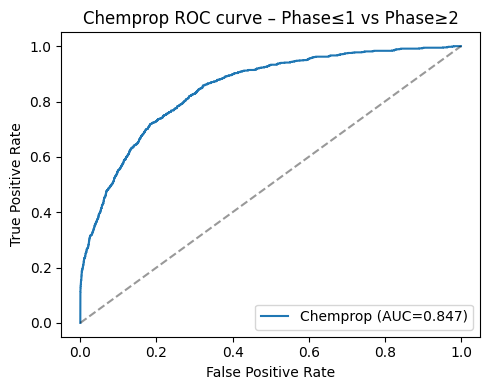

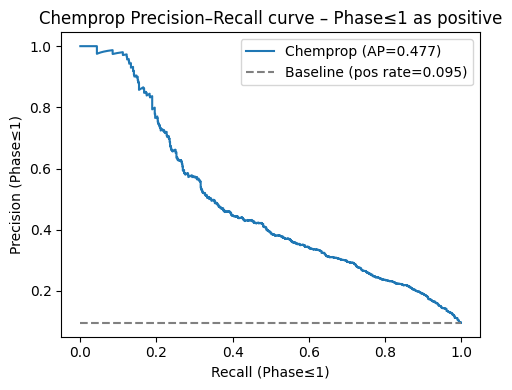

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

# ROC curve
fpr, tpr, _ = roc_curve(y_true, y_score)
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"Chemprop (AUC={roc:.3f})")
plt.plot([0, 1], [0, 1], "k--", alpha=0.4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Chemprop ROC curve – Phase≤1 vs Phase≥2")
plt.legend()
plt.tight_layout()
plt.show()

# PR curve
precision, recall, _ = precision_recall_curve(y_true, y_score)
base_rate = (y_true == 1).mean()

plt.figure(figsize=(5, 4))
plt.plot(recall, precision, label=f"Chemprop (AP={ap:.3f})")
plt.hlines(base_rate, 0, 1, linestyles="--", colors="gray",
           label=f"Baseline (pos rate={base_rate:.3f})")
plt.xlabel("Recall (Phase≤1)")
plt.ylabel("Precision (Phase≤1)")
plt.title("Chemprop Precision–Recall curve – Phase≤1 as positive")
plt.legend()
plt.tight_layout()
plt.show()


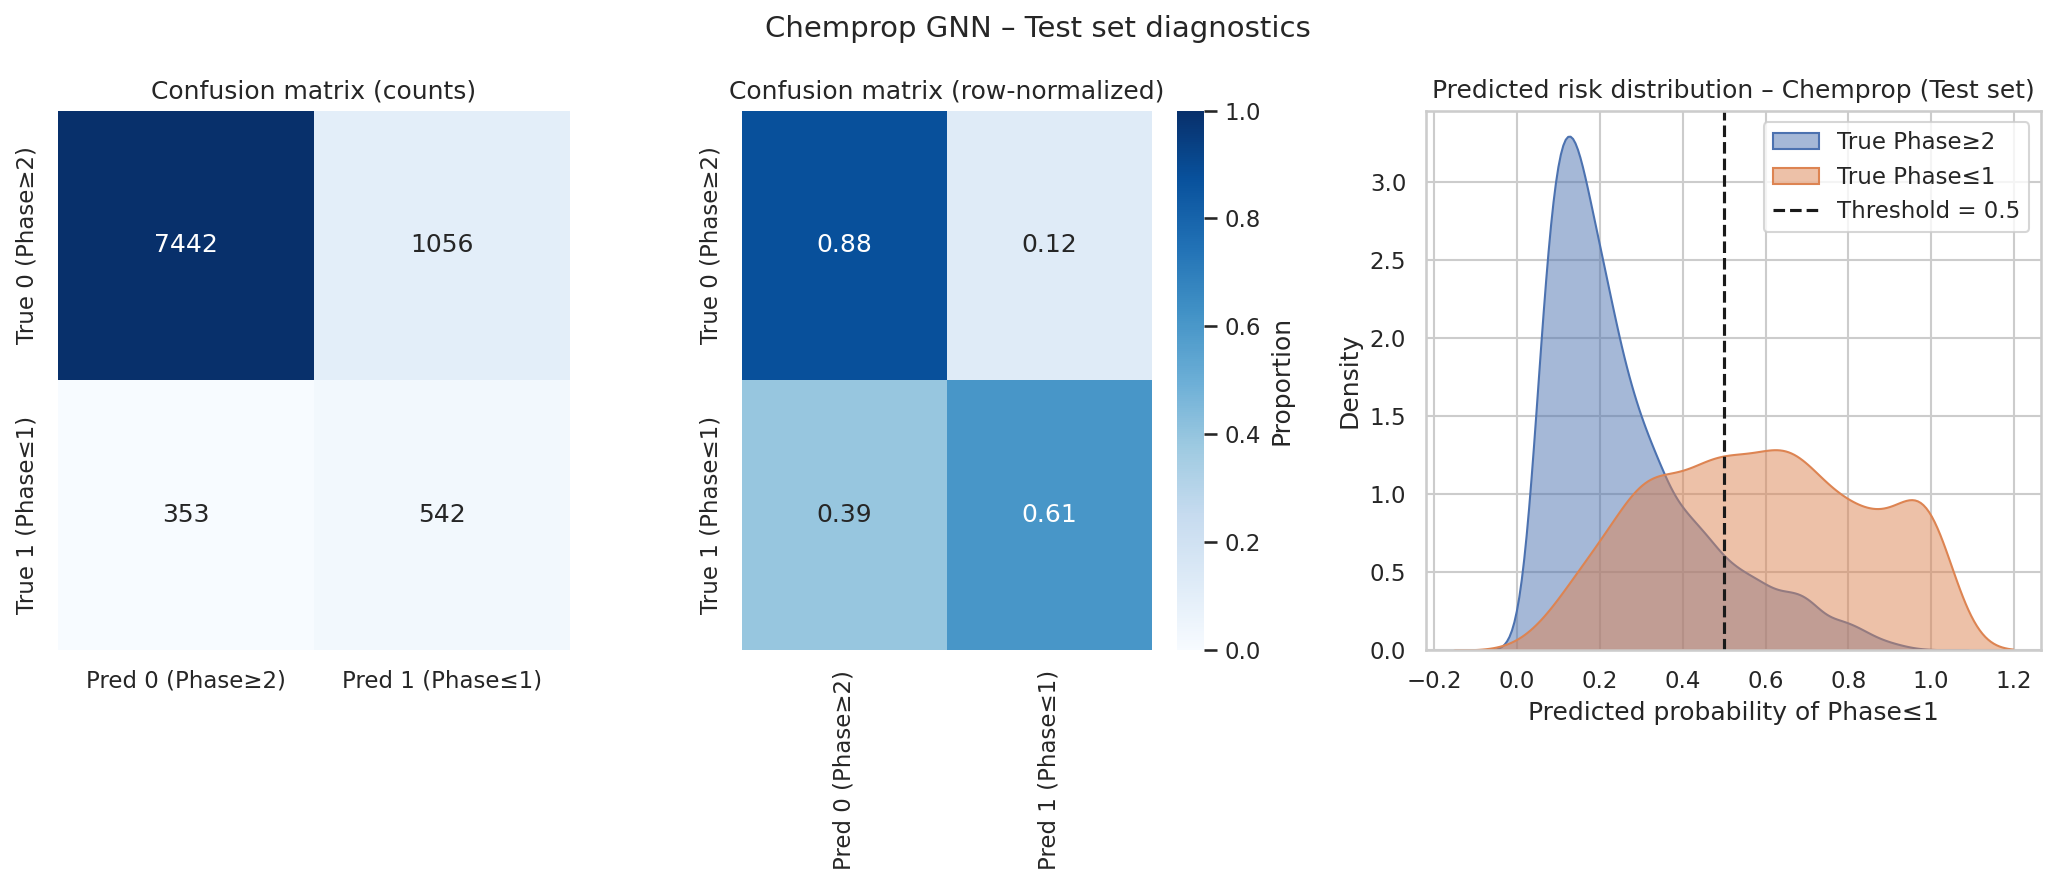

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 150

# ------------------------------------------------
# 1) 입력: Chemprop test set 예측
# ------------------------------------------------
# y_true: 0 = Phase≥2, 1 = Phase≤1
# y_score: predicted probability of Phase≤1 (from chemprop)
y_true = np.asarray(y_true).astype(int)
y_score = np.asarray(y_score).astype(float)

threshold = 0.5
y_pred = (y_score >= threshold).astype(int)

# Confusion matrix (counts & row-normalized)
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

# ------------------------------------------------
# 2) Figure: confusion 2개 + risk 분포 1개
# ------------------------------------------------
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1.2])

# (A) Confusion matrix – counts
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Pred 0 (Phase≥2)", "Pred 1 (Phase≤1)"],
    yticklabels=["True 0 (Phase≥2)", "True 1 (Phase≤1)"],
    ax=ax1,
)
ax1.set_title("Confusion matrix (counts)")
ax1.set_xlabel("")
ax1.set_ylabel("")

# (B) Confusion matrix – row-normalized
ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    vmin=0,
    vmax=1,
    cbar_kws={"label": "Proportion"},
    xticklabels=["Pred 0 (Phase≥2)", "Pred 1 (Phase≤1)"],
    yticklabels=["True 0 (Phase≥2)", "True 1 (Phase≤1)"],
    ax=ax2,
)
ax2.set_title("Confusion matrix (row-normalized)")
ax2.set_xlabel("")
ax2.set_ylabel("")

# (C) Predicted risk distribution
ax3 = fig.add_subplot(gs[0, 2])
sns.kdeplot(
    x=y_score[y_true == 0],
    fill=True,
    alpha=0.5,
    label="True Phase≥2",
    ax=ax3,
)
sns.kdeplot(
    x=y_score[y_true == 1],
    fill=True,
    alpha=0.5,
    label="True Phase≤1",
    ax=ax3,
)
ax3.axvline(threshold, color="k", linestyle="--", label=f"Threshold = {threshold}")
ax3.set_xlabel("Predicted probability of Phase≤1")
ax3.set_ylabel("Density")
ax3.set_title("Predicted risk distribution – Chemprop (Test set)")
ax3.legend(loc="upper right")

fig.suptitle("Chemprop GNN – Test set diagnostics", y=0.98, fontsize=14)
plt.tight_layout()
plt.show()


In [3]:
!pip install rdkit

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    balanced_accuracy_score,
    roc_auc_score,
    average_precision_score,
    roc_curve,
    precision_recall_curve,
)

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 150

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 61.6 MB/s eta 0:00:00
Device: cuda


In [4]:
# df5 가 이미 메모리에 있다고 가정
df = df5.copy()

# 1) Phase1_label 정의 (max_phase ≤ 1 → 1, else 0)
df["phase1_label"] = (df["max_phase"] <= 1).astype(int)

# 2) SMILES / label 있는 것만 사용
df_model = df[["canonical_smiles", "phase1_label"]].dropna().reset_index(drop=True)
print("샘플 수:", len(df_model))
print(df_model["phase1_label"].value_counts(normalize=True).rename("ratio"))
print()

smiles_list = df_model["canonical_smiles"].tolist()
y_all = df_model["phase1_label"].values.astype(np.int64)


# 3) SMILES → Morgan fingerprint(ECFP2048) 변환 함수
def smiles_to_ecfp(smiles_list, radius=2, n_bits=2048):
    fps = []
    invalid_idx = []
    for i, smi in enumerate(smiles_list):
        mol = Chem.MolFromSmiles(smi)
        if mol is None:
            # invalid SMILES → all-zero vector
            arr = np.zeros(n_bits, dtype=np.float32)
            invalid_idx.append(i)
        else:
            bv = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
            arr = np.zeros((n_bits,), dtype=np.int8)
            DataStructs.ConvertToNumpyArray(bv, arr)
            arr = arr.astype(np.float32)
        fps.append(arr)
    fps = np.stack(fps)
    return fps, invalid_idx

X_all, invalid_idx = smiles_to_ecfp(smiles_list, radius=2, n_bits=2048)
print("ECFP shape:", X_all.shape)
print("Invalid SMILES 개수:", len(invalid_idx))


샘플 수: 9393
phase1_label
0    0.904716
1    0.095284
Name: ratio, dtype: float64



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATION WARNING: please use MorganGenerator
[04:43:20] DEPRECATI

ECFP shape: (9393, 2048)
Invalid SMILES 개수: 0


[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerator
[04:43:22] DEPRECATION WARNING: please use MorganGenerat

In [5]:
# 8:1:1 stratified split
idx_all = np.arange(len(df_model))

idx_train, idx_temp = train_test_split(
    idx_all,
    test_size=0.2,
    stratify=y_all,
    random_state=42,
)

idx_val, idx_test = train_test_split(
    idx_temp,
    test_size=0.5,
    stratify=y_all[idx_temp],
    random_state=42,
)

def index_select(X, idx):
    return X[idx], y_all[idx]

X_train, y_train = index_select(X_all, idx_train)
X_val, y_val     = index_select(X_all, idx_val)
X_test, y_test   = index_select(X_all, idx_test)

print("Train:", X_train.shape, "pos rate:", y_train.mean())
print("Val  :", X_val.shape,   "pos rate:", y_val.mean())
print("Test :", X_test.shape,  "pos rate:", y_test.mean())


class FingerprintDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).float()
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


train_ds = FingerprintDataset(X_train, y_train)
val_ds   = FingerprintDataset(X_val, y_val)
test_ds  = FingerprintDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=512, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=512, shuffle=False)


Train: (7514, 2048) pos rate: 0.09528879425073197
Val  : (939, 2048) pos rate: 0.09478168264110756
Test : (940, 2048) pos rate: 0.09574468085106383


In [6]:
class ECFP_MLP(nn.Module):
    def __init__(self, input_dim=2048, hidden1=512, hidden2=128, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden2, 1),
        )
    def forward(self, x):
        return self.net(x).squeeze(1)  # logits


model = ECFP_MLP(input_dim=X_all.shape[1]).to(device)

# 클래스 불균형 보정: pos_weight = N_neg / N_pos
pos_weight_value = (len(y_train) - y_train.sum()) / y_train.sum()
pos_weight = torch.tensor([pos_weight_value], dtype=torch.float32, device=device)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 30

def eval_loader(model, loader):
    model.eval()
    ys = []
    ps = []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            yb = yb.to(device)
            logits = model(xb)
            prob = torch.sigmoid(logits)
            ys.append(yb.cpu().numpy())
            ps.append(prob.cpu().numpy())
    ys = np.concatenate(ys)
    ps = np.concatenate(ps)
    return ys, ps


best_state = None
best_val_ap = -np.inf

for epoch in range(1, num_epochs + 1):
    model.train()
    total_loss = 0.0
    for xb, yb in train_loader:
        xb = xb.to(device)
        yb = yb.to(device)

        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * len(xb)

    train_loss = total_loss / len(train_ds)
    y_val_true, y_val_prob = eval_loader(model, val_loader)
    val_roc = roc_auc_score(y_val_true, y_val_prob)
    val_ap  = average_precision_score(y_val_true, y_val_prob)

    if val_ap > best_val_ap:
        best_val_ap = val_ap
        best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}

    print(f"Epoch {epoch:02d} | train_loss={train_loss:.4f} | "
          f"val ROC-AUC={val_roc:.3f} | val AP={val_ap:.3f}")

# best state 로드
model.load_state_dict(best_state)
model.to(device)
print("\nBest val AP:", best_val_ap)


Epoch 01 | train_loss=1.1810 | val ROC-AUC=0.728 | val AP=0.219
Epoch 02 | train_loss=0.8600 | val ROC-AUC=0.708 | val AP=0.225
Epoch 03 | train_loss=0.5389 | val ROC-AUC=0.684 | val AP=0.225
Epoch 04 | train_loss=0.2982 | val ROC-AUC=0.652 | val AP=0.198
Epoch 05 | train_loss=0.1818 | val ROC-AUC=0.651 | val AP=0.221
Epoch 06 | train_loss=0.1150 | val ROC-AUC=0.654 | val AP=0.214
Epoch 07 | train_loss=0.0776 | val ROC-AUC=0.648 | val AP=0.224
Epoch 08 | train_loss=0.0624 | val ROC-AUC=0.654 | val AP=0.227
Epoch 09 | train_loss=0.0558 | val ROC-AUC=0.660 | val AP=0.236
Epoch 10 | train_loss=0.0449 | val ROC-AUC=0.647 | val AP=0.231
Epoch 11 | train_loss=0.0347 | val ROC-AUC=0.647 | val AP=0.215
Epoch 12 | train_loss=0.0304 | val ROC-AUC=0.648 | val AP=0.242
Epoch 13 | train_loss=0.0260 | val ROC-AUC=0.668 | val AP=0.233
Epoch 14 | train_loss=0.0318 | val ROC-AUC=0.654 | val AP=0.238
Epoch 15 | train_loss=0.0286 | val ROC-AUC=0.665 | val AP=0.245
Epoch 16 | train_loss=0.0275 | val ROC-A

=== ECFP(2048)+MLP – Test set metrics ===
Accuracy          : 0.864
Balanced Accuracy : 0.557
ROC-AUC           : 0.630
PR-AUC (AP)       : 0.208
Confusion matrix (counts):
[[796  54]
 [ 74  16]]


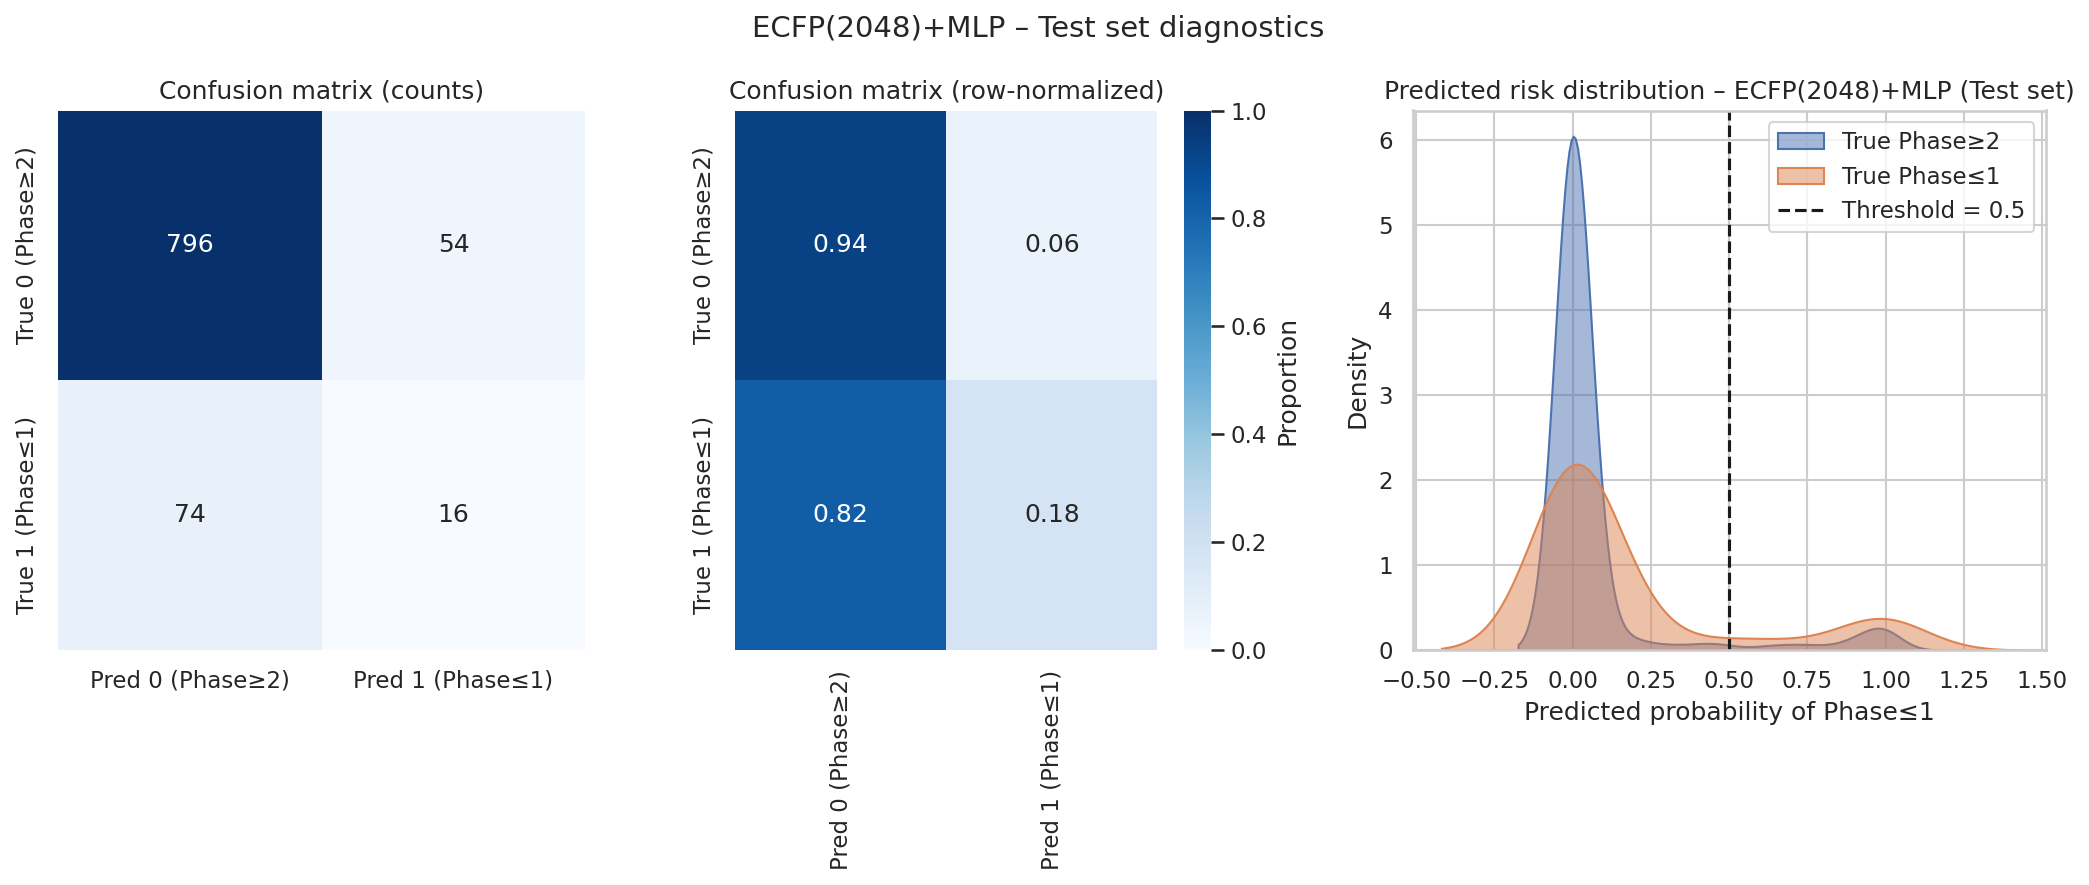

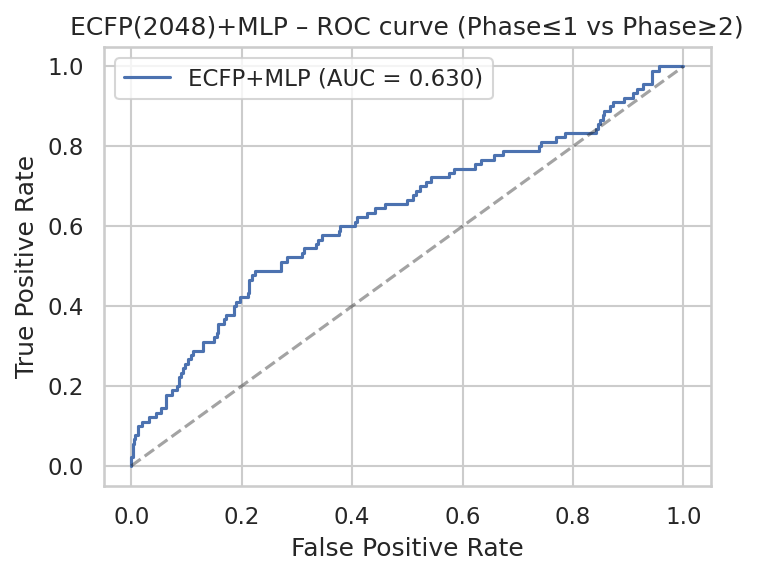

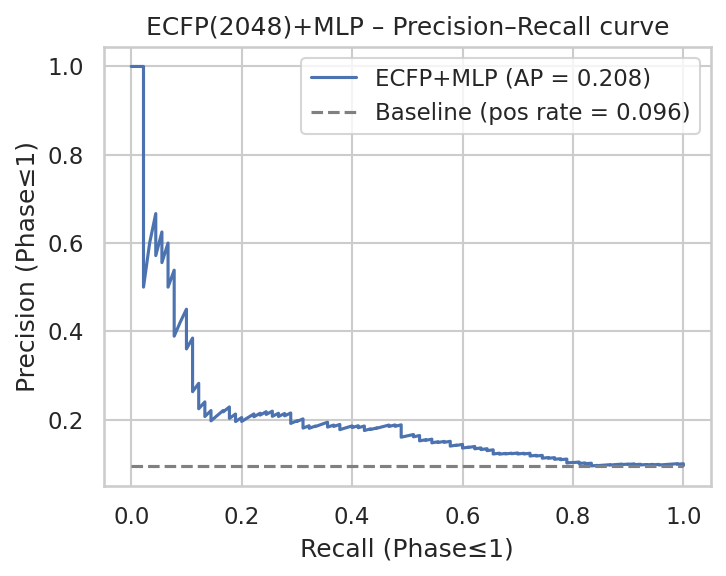

In [7]:
# ---------------------------
# Test set 예측 & metrics
# ---------------------------
y_test_true, y_test_prob = eval_loader(model, test_loader)
y_test_pred = (y_test_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test_true, y_test_pred, labels=[0, 1])
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

acc     = accuracy_score(y_test_true, y_test_pred)
bal_acc = balanced_accuracy_score(y_test_true, y_test_pred)
roc     = roc_auc_score(y_test_true, y_test_prob)
ap      = average_precision_score(y_test_true, y_test_prob)

print("=== ECFP(2048)+MLP – Test set metrics ===")
print("Accuracy          :", f"{acc:.3f}")
print("Balanced Accuracy :", f"{bal_acc:.3f}")
print("ROC-AUC           :", f"{roc:.3f}")
print("PR-AUC (AP)       :", f"{ap:.3f}")
print("Confusion matrix (counts):")
print(cm)


# ---------------------------
# (A) Confusion + risk 분포 (chemprop 스타일)
# ---------------------------
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1.2])

# counts
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Pred 0 (Phase≥2)", "Pred 1 (Phase≤1)"],
    yticklabels=["True 0 (Phase≥2)", "True 1 (Phase≤1)"],
    ax=ax1,
)
ax1.set_title("Confusion matrix (counts)")
ax1.set_xlabel("")
ax1.set_ylabel("")

# normalized
ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    vmin=0, vmax=1,
    cbar_kws={"label": "Proportion"},
    xticklabels=["Pred 0 (Phase≥2)", "Pred 1 (Phase≤1)"],
    yticklabels=["True 0 (Phase≥2)", "True 1 (Phase≤1)"],
    ax=ax2,
)
ax2.set_title("Confusion matrix (row-normalized)")
ax2.set_xlabel("")
ax2.set_ylabel("")

# risk distribution
ax3 = fig.add_subplot(gs[0, 2])
sns.kdeplot(
    x=y_test_prob[y_test_true == 0],
    fill=True, alpha=0.5,
    label="True Phase≥2",
    ax=ax3,
)
sns.kdeplot(
    x=y_test_prob[y_test_true == 1],
    fill=True, alpha=0.5,
    label="True Phase≤1",
    ax=ax3,
)
ax3.axvline(0.5, color="k", linestyle="--", label="Threshold = 0.5")
ax3.set_xlabel("Predicted probability of Phase≤1")
ax3.set_ylabel("Density")
ax3.set_title("Predicted risk distribution – ECFP(2048)+MLP (Test set)")
ax3.legend(loc="upper right")

fig.suptitle("ECFP(2048)+MLP – Test set diagnostics", y=0.98, fontsize=14)
plt.tight_layout()
plt.show()


# ---------------------------
# (B) ROC & PR curves
# ---------------------------
# ROC
fpr, tpr, _ = roc_curve(y_test_true, y_test_prob)
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"ECFP+MLP (AUC = {roc:.3f})")
plt.plot([0, 1], [0, 1], "k--", alpha=0.4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ECFP(2048)+MLP – ROC curve (Phase≤1 vs Phase≥2)")
plt.legend()
plt.tight_layout()
plt.show()

# PR
precision, recall, _ = precision_recall_curve(y_test_true, y_test_prob)
base_rate = (y_test_true == 1).mean()

plt.figure(figsize=(5, 4))
plt.plot(recall, precision, label=f"ECFP+MLP (AP = {ap:.3f})")
plt.hlines(base_rate, 0, 1, linestyles="--", colors="gray",
           label=f"Baseline (pos rate = {base_rate:.3f})")
plt.xlabel("Recall (Phase≤1)")
plt.ylabel("Precision (Phase≤1)")
plt.title("ECFP(2048)+MLP – Precision–Recall curve")
plt.legend()
plt.tight_layout()
plt.show()


전체 데이터 Confusion matrix:
[[8353  145]
 [ 139  756]]


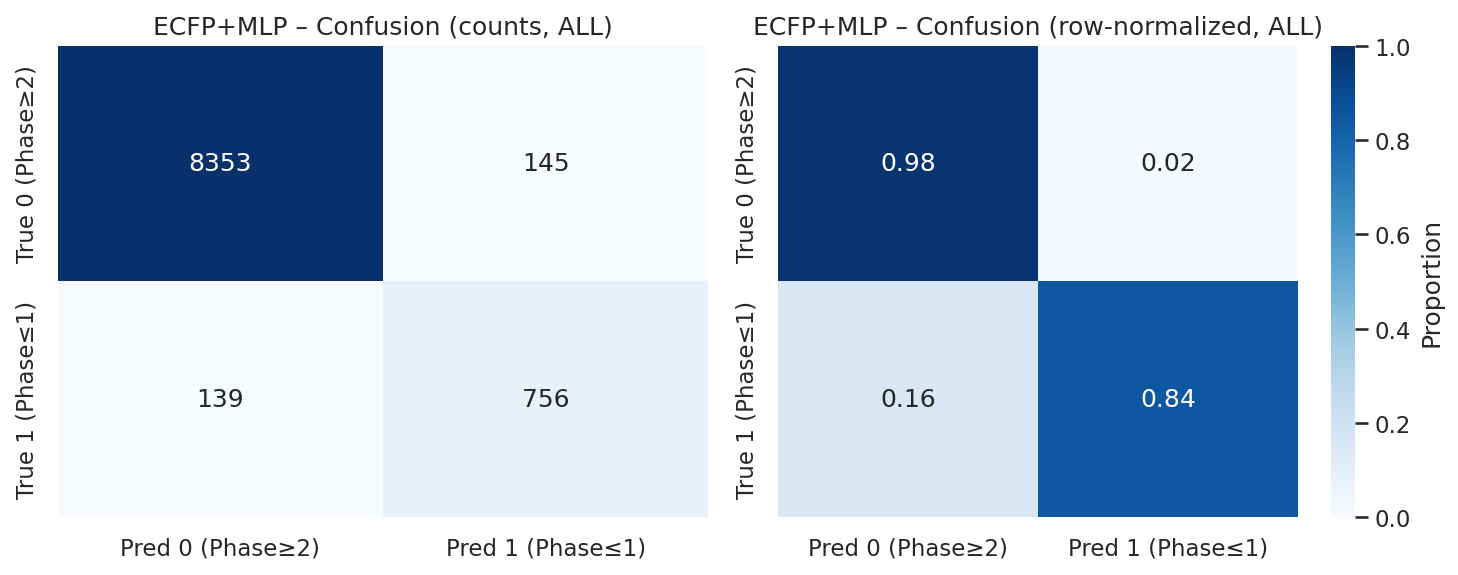

In [8]:
# 전체 데이터용 DataLoader
all_ds = FingerprintDataset(X_all, y_all)
all_loader = DataLoader(all_ds, batch_size=512, shuffle=False)

y_all_true, y_all_prob = eval_loader(model, all_loader)
y_all_pred = (y_all_prob >= 0.5).astype(int)

cm_all = confusion_matrix(y_all_true, y_all_pred, labels=[0, 1])
cm_all_norm = cm_all.astype(float) / cm_all.sum(axis=1, keepdims=True)

print("전체 데이터 Confusion matrix:")
print(cm_all)

fig = plt.figure(figsize=(10, 4))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(
    cm_all, annot=True, fmt="d", cmap="Blues", cbar=False,
    xticklabels=["Pred 0 (Phase≥2)", "Pred 1 (Phase≤1)"],
    yticklabels=["True 0 (Phase≥2)", "True 1 (Phase≤1)"],
    ax=ax1,
)
ax1.set_title("ECFP+MLP – Confusion (counts, ALL)")

ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(
    cm_all_norm, annot=True, fmt=".2f", cmap="Blues",
    vmin=0, vmax=1, cbar_kws={"label": "Proportion"},
    xticklabels=["Pred 0 (Phase≥2)", "Pred 1 (Phase≤1)"],
    yticklabels=["True 0 (Phase≥2)", "True 1 (Phase≤1)"],
    ax=ax2,
)
ax2.set_title("ECFP+MLP – Confusion (row-normalized, ALL)")

plt.tight_layout()
plt.show()


In [28]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix

# -------------------------
# 1) 원본 df5 + Chemprop 예측 로딩
# -------------------------
df = df5.copy()

# Phase≤1 라벨
df["phase1_label"] = (df["max_phase"] <= 1).astype(int)

# Chemprop predict 결과 (smiles + y(=pred prob) 형태라고 가정)
df_cp = pd.read_csv("chemprop_phase1_preds.csv")

print(df_cp.head())

# 컬럼 이름이 'y'가 아니면 여기서 고쳐줘
pred_col = "pred_0"   # 필요하면 'y_pred' 같은 이름으로 변경
smiles_col_pred = "smiles"

# df5의 SMILES 컬럼 이름
smiles_col_df5 = "canonical_smiles"

# 머지
df_merged = df.merge(
    df_cp[[smiles_col_pred, pred_col]],
    left_on=smiles_col_df5,
    right_on=smiles_col_pred,
    how="inner"
)

df_merged = df_merged.rename(columns={pred_col: "chemprop_prob"})
print("머지 후 샘플 수:", len(df_merged))
print(df_merged[["phase1_label", "chemprop_prob"]].head())


                                             smiles  y    pred_0
0     COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC  0  0.412978
1                              CN1CCC[C@H]1c1cccnc1  0  0.208993
2                            c1cncc([C@@H]2CCCN2)c1  1  0.382186
3  CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23  0  0.217964
4                   CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21  0  0.198882
머지 후 샘플 수: 9393
   phase1_label  chemprop_prob
0             0       0.412978
1             0       0.208993
2             1       0.382186
3             0       0.217964
4             0       0.198882


In [29]:
# SHAP에서 영향력 컸던 피처 후보
top_rule_feats = [
    "qed_rdkit",
    "qed_weighted",
    "sa_score",
    "num_chiral_centers",
    "leadlike_oprea_pass",
    "aromatic_atom_fraction",
    "druglike_dsx_pass",
    "lipinski_pass",
    "lipinski_violations",
    "dev_atoms_Ghose_low_pos",
    "num_ro5_violations",
    "num_lipinski_ro5_violations",
    "muegge_pass",
    "fsp3",
    "total_rule_violations",
    "ro3_pass",
    "veber_violations",
    "np_likeness",
    "dev_MR_Ghose_high_pos_z",
    "dev_MW_Ghose_low_pos_z",
]

# 실제 df에 존재하는 것만 사용
top_rule_feats = [c for c in top_rule_feats if c in df_merged.columns]
print("사용 가능한 SHAP top features:", top_rule_feats)

# bool → int 캐스팅
bool_like = ["lipinski_pass", "leadlike_oprea_pass",
             "druglike_dsx_pass", "muegge_pass",
             "ro3_pass"]
for c in bool_like:
    if c in df_merged.columns:
        df_merged[c] = df_merged[c].astype(int)

# 모델용 데이터프레임 (결측 제거)
feature_cols_rule = top_rule_feats
feature_cols_hybrid = top_rule_feats + ["chemprop_prob"]

df_model = df_merged.dropna(subset=feature_cols_hybrid + ["phase1_label"]).copy()

X_rule = df_model[feature_cols_rule].astype(float)
X_hybrid = df_model[feature_cols_hybrid].astype(float)
y = df_model["phase1_label"].astype(int)
chemprop_all = df_model["chemprop_prob"].values

print("최종 샘플 수:", len(df_model))
print("Phase≤1 비율:", y.mean())


사용 가능한 SHAP top features: ['qed_rdkit', 'qed_weighted', 'sa_score', 'num_chiral_centers', 'leadlike_oprea_pass', 'aromatic_atom_fraction', 'druglike_dsx_pass', 'lipinski_pass', 'lipinski_violations', 'dev_atoms_Ghose_low_pos', 'num_ro5_violations', 'num_lipinski_ro5_violations', 'muegge_pass', 'fsp3', 'total_rule_violations', 'ro3_pass', 'veber_violations', 'np_likeness', 'dev_MR_Ghose_high_pos_z', 'dev_MW_Ghose_low_pos_z']
최종 샘플 수: 9393
Phase≤1 비율: 0.09528372192057916


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 공통 index 기반 split (동일한 train/test 인덱스 사용)
indices = np.arange(len(df_model))
train_idx, test_idx = train_test_split(
    indices,
    test_size=0.2,
    stratify=y,
    random_state=42
)

y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

X_rule_train = X_rule.iloc[train_idx]
X_rule_test  = X_rule.iloc[test_idx]

X_hybrid_train = X_hybrid.iloc[train_idx]
X_hybrid_test  = X_hybrid.iloc[test_idx]

chemprop_test = chemprop_all[test_idx]

# -------------------------
# A) Rule-only RandomForest
# -------------------------
rf_rule = RandomForestClassifier(
    n_estimators=400,
    max_depth=5,
    min_samples_leaf=20,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1,
)
rf_rule.fit(X_rule_train, y_train)
y_prob_rule = rf_rule.predict_proba(X_rule_test)[:, 1]

auc_rule = roc_auc_score(y_test, y_prob_rule)
ap_rule = average_precision_score(y_test, y_prob_rule)
print(f"[Rule-only RF] ROC-AUC={auc_rule:.3f}, AP={ap_rule:.3f}")

# -------------------------
# B) Chemprop-only (simple baseline)
# -------------------------
auc_cp = roc_auc_score(y_test, chemprop_test)
ap_cp = average_precision_score(y_test, chemprop_test)
print(f"[Chemprop prob only] ROC-AUC={auc_cp:.3f}, AP={ap_cp:.3f}")

# -------------------------
# C) Hybrid RF (rule + chemprop_prob)
# -------------------------
rf_hybrid = RandomForestClassifier(
    n_estimators=400,
    max_depth=5,
    min_samples_leaf=20,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1,
)
rf_hybrid.fit(X_hybrid_train, y_train)
y_prob_hybrid = rf_hybrid.predict_proba(X_hybrid_test)[:, 1]

auc_hybrid = roc_auc_score(y_test, y_prob_hybrid)
ap_hybrid = average_precision_score(y_test, y_prob_hybrid)
print(f"[Hybrid RF (rule+Chemprop)] ROC-AUC={auc_hybrid:.3f}, AP={ap_hybrid:.3f}")


[Rule-only RF] ROC-AUC=0.728, AP=0.244
[Chemprop prob only] ROC-AUC=0.853, AP=0.459
[Hybrid RF (rule+Chemprop)] ROC-AUC=0.843, AP=0.393


In [31]:
print("\n=== Weighted ensemble of Chemprop + Rule RF ===")
best_auc, best_ap, best_w = -1, -1, None

for w in np.linspace(0, 1, 11):  # 0.0, 0.1, ..., 1.0
    y_ens = w * chemprop_test + (1 - w) * y_prob_rule
    auc = roc_auc_score(y_test, y_ens)
    ap = average_precision_score(y_test, y_ens)
    print(f"w_chemprop={w:.1f} → ROC-AUC={auc:.3f}, AP={ap:.3f}")
    if auc > best_auc:
        best_auc, best_ap, best_w = auc, ap, w

print(f"\n[Best ensemble] w_chemprop={best_w:.2f}, ROC-AUC={best_auc:.3f}, AP={best_ap:.3f}")



=== Weighted ensemble of Chemprop + Rule RF ===
w_chemprop=0.0 → ROC-AUC=0.728, AP=0.244
w_chemprop=0.1 → ROC-AUC=0.764, AP=0.294
w_chemprop=0.2 → ROC-AUC=0.794, AP=0.335
w_chemprop=0.3 → ROC-AUC=0.816, AP=0.368
w_chemprop=0.4 → ROC-AUC=0.831, AP=0.393
w_chemprop=0.5 → ROC-AUC=0.841, AP=0.415
w_chemprop=0.6 → ROC-AUC=0.847, AP=0.432
w_chemprop=0.7 → ROC-AUC=0.850, AP=0.442
w_chemprop=0.8 → ROC-AUC=0.852, AP=0.448
w_chemprop=0.9 → ROC-AUC=0.853, AP=0.458
w_chemprop=1.0 → ROC-AUC=0.853, AP=0.459

[Best ensemble] w_chemprop=0.90, ROC-AUC=0.853, AP=0.458


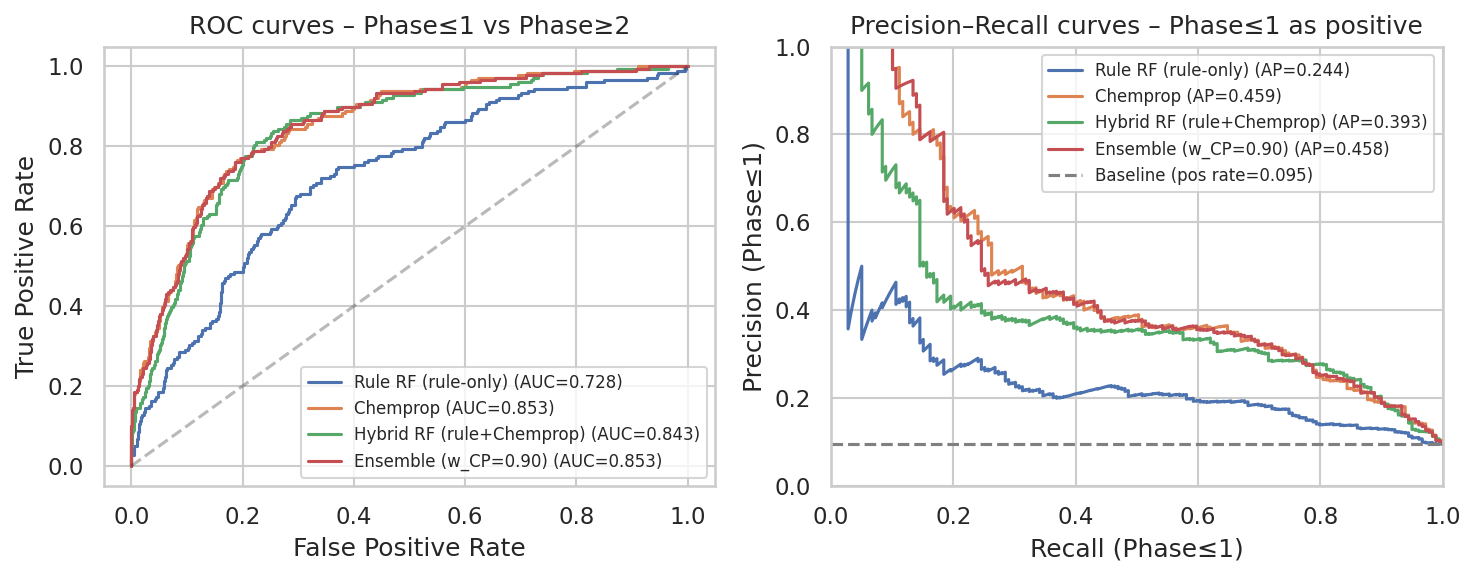

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, precision_recall_curve,
    roc_auc_score, average_precision_score
)

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 150

# ===== 1) Ensemble 확률 다시 계산 =====
y_ens_best = best_w * chemprop_test + (1 - best_w) * y_prob_rule

model_probs = {
    "Rule RF (rule-only)": y_prob_rule,
    "Chemprop": chemprop_test,
    "Hybrid RF (rule+Chemprop)": y_prob_hybrid,
    f"Ensemble (w_CP={best_w:.2f})": y_ens_best,
}

# ===== 2) ROC & PR figure =====
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# (a) ROC
for name, prob in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    auc = roc_auc_score(y_test, prob)
    axes[0].plot(fpr, tpr, lw=1.5, label=f"{name} (AUC={auc:.3f})")

axes[0].plot([0, 1], [0, 1], "k--", alpha=0.3)
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC curves – Phase≤1 vs Phase≥2")
axes[0].legend(fontsize=8, loc="lower right")

# (b) Precision–Recall
base_rate = (y_test == 1).mean()

for name, prob in model_probs.items():
    precision, recall, _ = precision_recall_curve(y_test, prob)
    ap = average_precision_score(y_test, prob)
    axes[1].plot(recall, precision, lw=1.5, label=f"{name} (AP={ap:.3f})")

axes[1].hlines(
    base_rate, 0, 1,
    linestyles="--", colors="gray",
    label=f"Baseline (pos rate={base_rate:.3f})"
)
axes[1].set_xlabel("Recall (Phase≤1)")
axes[1].set_ylabel("Precision (Phase≤1)")
axes[1].set_title("Precision–Recall curves – Phase≤1 as positive")
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].legend(fontsize=8, loc="upper right")

plt.tight_layout()
plt.show()


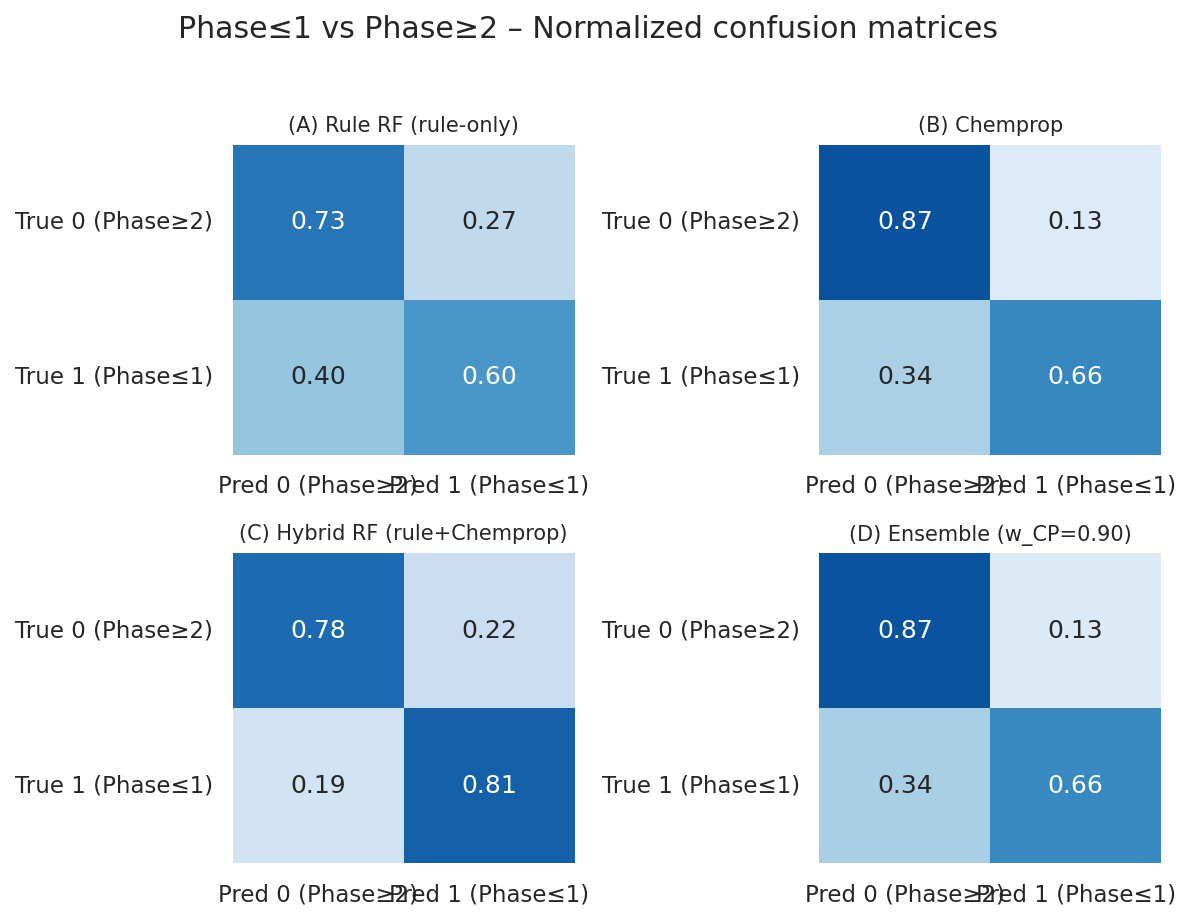

In [33]:
from sklearn.metrics import confusion_matrix
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
titles = [
    "(A) Rule RF (rule-only)",
    "(B) Chemprop",
    "(C) Hybrid RF (rule+Chemprop)",
    f"(D) Ensemble (w_CP={best_w:.2f})",
]

for ax, (name, prob), title in zip(axes.flatten(), model_probs.items(), titles):
    y_pred = (prob >= 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

    sns.heatmap(
        cm_norm,
        annot=True, fmt=".2f", cmap="Blues",
        vmin=0, vmax=1, cbar=False,
        xticklabels=["Pred 0 (Phase≥2)", "Pred 1 (Phase≤1)"],
        yticklabels=["True 0 (Phase≥2)", "True 1 (Phase≤1)"],
        ax=ax,
    )
    ax.set_title(title, fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.suptitle("Phase≤1 vs Phase≥2 – Normalized confusion matrices", y=1.02)
plt.tight_layout()
plt.show()


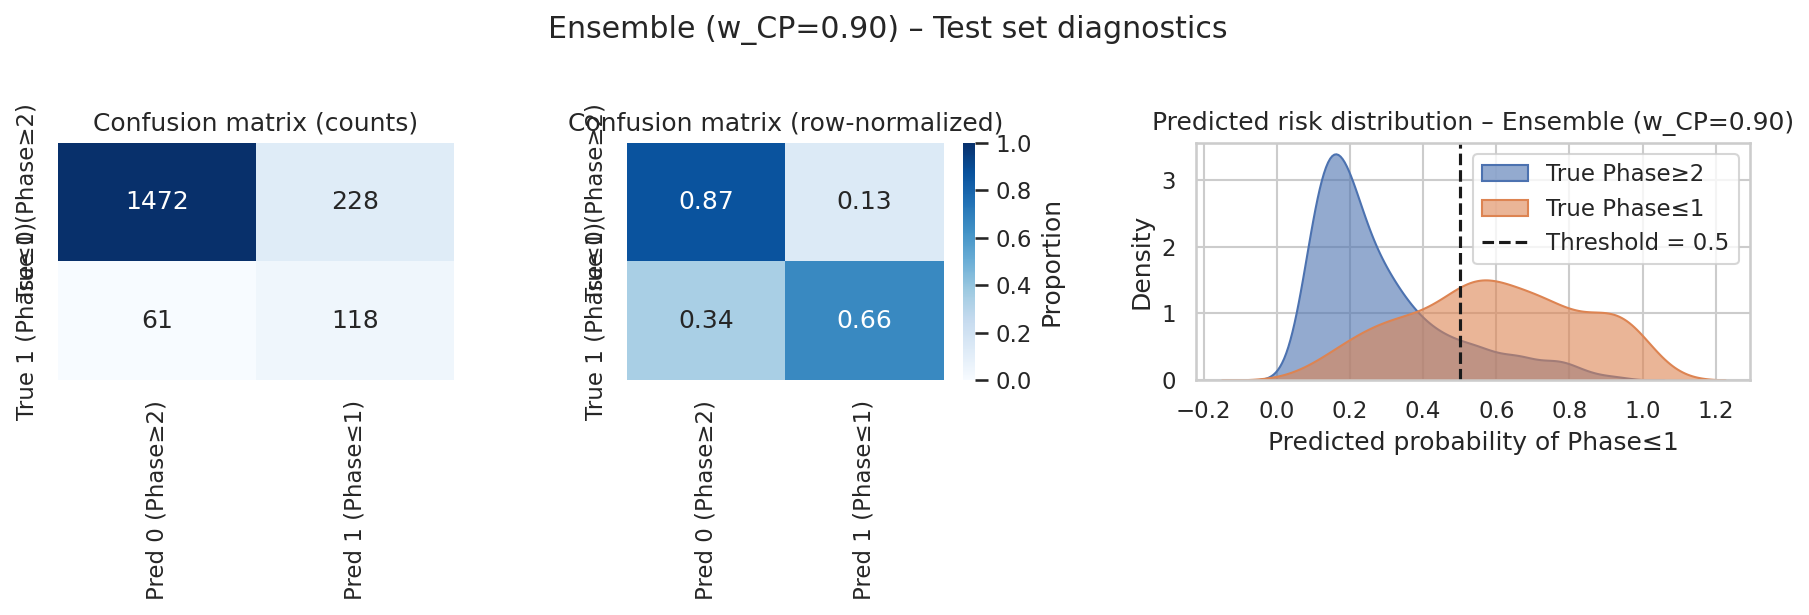

In [34]:
import numpy as np

best_name = f"Ensemble (w_CP={best_w:.2f})"
best_prob = y_ens_best

# confusion (counts + row-normalized) + density 3-panel like before
cm = confusion_matrix(y_test, (best_prob >= 0.5).astype(int), labels=[0, 1])
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

fig = plt.figure(figsize=(12, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1.4])

# (1) counts
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", cbar=False,
    xticklabels=["Pred 0 (Phase≥2)", "Pred 1 (Phase≤1)"],
    yticklabels=["True 0 (Phase≥2)", "True 1 (Phase≤1)"],
    ax=ax1,
)
ax1.set_title("Confusion matrix (counts)")
ax1.set_xlabel("")
ax1.set_ylabel("")

# (2) row-normalized
ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(
    cm_norm, annot=True, fmt=".2f", cmap="Blues",
    vmin=0, vmax=1, cbar_kws={"label": "Proportion"},
    xticklabels=["Pred 0 (Phase≥2)", "Pred 1 (Phase≤1)"],
    yticklabels=["True 0 (Phase≥2)", "True 1 (Phase≤1)"],
    ax=ax2,
)
ax2.set_title("Confusion matrix (row-normalized)")
ax2.set_xlabel("")
ax2.set_ylabel("")

# (3) risk distribution
ax3 = fig.add_subplot(gs[0, 2])
sns.kdeplot(
    best_prob[y_test == 0],
    fill=True, alpha=0.6, label="True Phase≥2", ax=ax3
)
sns.kdeplot(
    best_prob[y_test == 1],
    fill=True, alpha=0.6, label="True Phase≤1", ax=ax3
)
ax3.axvline(0.5, ls="--", color="k", label="Threshold = 0.5")
ax3.set_xlabel("Predicted probability of Phase≤1")
ax3.set_ylabel("Density")
ax3.set_title(f"Predicted risk distribution – {best_name}")
ax3.legend()

plt.suptitle(f"{best_name} – Test set diagnostics", y=1.02)
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd

url = "https://raw.githubusercontent.com/Parkss0/251119/ef5c28b198bdd461a7750cc1cbbeca2e611b8348/df7.csv"

df7 = pd.read_csv(url)

df7.head()


,Unnamed: 0,molregno,chembl_id,max_phase,canonical_smiles,standard_inchi_key,mw_freebase,molecular_weight,alogp,hba,...,aromatic_rings,heavy_atoms,qed_weighted,np_likeness_score,natural_product,prodrug,ro3_pass,oral,parenteral,topical
0,269,8609,CHEMBL273977,2.0,O=S(=O)([O-])NC1CCCCC1.[Na+],UDIPTWFVPPPURJ-UHFFFAOYSA-M,201.22,201.22,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,NaN,0,0,0
1,727,29061,CHEMBL265502,3.0,Cc1ccc(C(=O)Nc2ccc(S(=O)(=O)O)c3cc(S(=O)(=O)O)...,FIAFUQMPZJWCLV-UHFFFAOYSA-N,1297.30,1297.30,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,NaN,0,0,0
2,747,30211,CHEMBL23393,3.0,CCCCCCCCCCCCOS(=O)(=O)[O-].[Na+],DBMJMQXJHONAFJ-UHFFFAOYSA-M,288.38,288.38,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,NaN,0,0,0
3,976,45921,CHEMBL32994,2.0,C[Si](C)(C)c1cc(C(=O)Nc2ccc(C(=O)O)cc2)cc([Si]...,VVTNSTLJOVCBDL-UHFFFAOYSA-N,385.61,385.61,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,NaN,0,0,0
4,1136,59311,CHEMBL413376,3.0,Cc1ccc(C(=O)Nc2ccc(S(=O)(=O)[O-])c3cc(S(=O)(=O...,VAPNKLKDKUDFHK-UHFFFAOYSA-H,1297.30,1429.19,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0


df7 샘플 수: 278
Phase≤1 비율:
phase1_label
0    0.874101
1    0.125899
Name: ratio, dtype: float64

Saved: df7_chemprop_input.csv
Using checkpoint: chemprop_phase1_model/model_0/checkpoints/best-epoch=25-val_loss=0.43.ckpt
2025-12-02T05:36:40 - INFO:chemprop.cli.main - Running in mode 'predict' with args: {'smiles_columns': ['smiles'], 'reaction_columns': None, 'no_header_row': False, 'num_workers': 0, 'batch_size': 64, 'accelerator': 'auto', 'devices': 'auto', 'rxn_mode': 'REAC_DIFF', 'multi_hot_atom_featurizer_mode': 'V2', 'keep_h': False, 'add_h': False, 'ignore_stereo': False, 'reorder_atoms': False, 'molecule_featurizers': None, 'descriptors_path': None, 'descriptors_columns': None, 'no_descriptor_scaling': False, 'no_atom_feature_scaling': False, 'no_atom_descriptor_scaling': False, 'no_bond_feature_scaling': False, 'no_bond_descriptor_scaling': False, 'atom_features_path': None, 'atom_descriptors_path': None, 'bond_features_path': None, 'bond_descriptors_path': None, 'constraints_pa

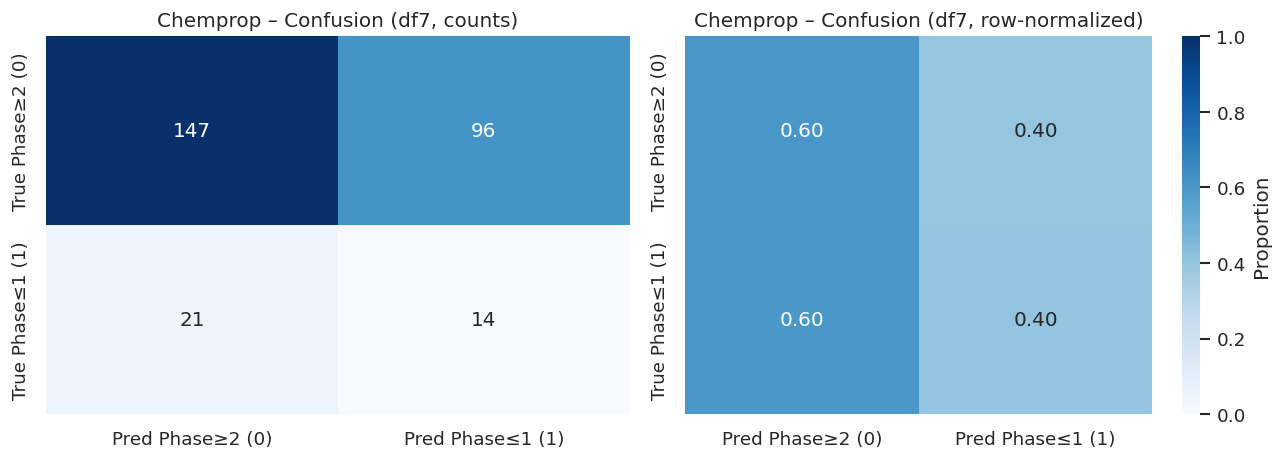

/tmp/ipython-input-1163589236.py:96: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_score[y_true == 0], shade=True, label="True Phase≥2")
/tmp/ipython-input-1163589236.py:98: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_score[y_true == 1], shade=True, label="True Phase≤1")


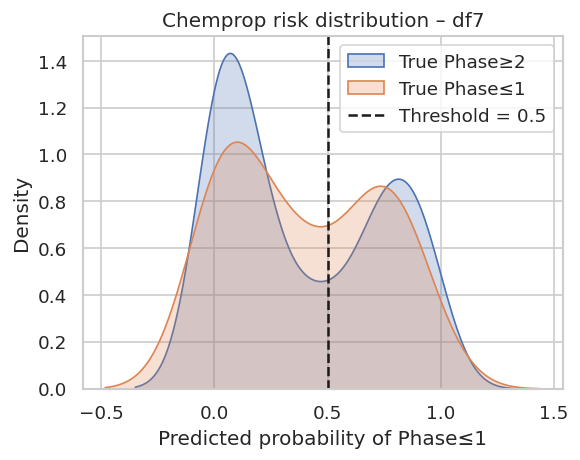

In [36]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix

sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# ---------------------------------------------------
# 1) df7에서 Chemprop 입력 포맷 만들기
#    - 라벨: max_phase <= 1  →  y = 1 (Phase≤1)
# ---------------------------------------------------
df7_clean = df7[["canonical_smiles", "max_phase"]].dropna().copy()
df7_clean["phase1_label"] = (df7_clean["max_phase"] <= 1).astype(int)

print("df7 샘플 수:", len(df7_clean))
print("Phase≤1 비율:")
print(df7_clean["phase1_label"].value_counts(normalize=True).rename("ratio"))

df7_cp = df7_clean.rename(columns={
    "canonical_smiles": "smiles",
    "phase1_label": "y"
})
input_path = "df7_chemprop_input.csv"
df7_cp.to_csv(input_path, index=False)
print("\nSaved:", input_path)

# ---------------------------------------------------
# 2) 학습해둔 best checkpoint 자동 탐색 후 predict
# ---------------------------------------------------
ckpts = glob.glob("chemprop_phase1_model/model_0/checkpoints/best-epoch=25-val_loss=0.43.ckpt")
ckpts.sort()
best_ckpt = ckpts[-1]   # 가장 마지막(가장 최근) ckpt 사용
print("Using checkpoint:", best_ckpt)

# Chemprop 예측
!chemprop predict \
  -i df7_chemprop_input.csv \
  --smiles-columns smiles \
  --model-paths $best_ckpt \
  -o df7_chemprop_preds.csv

# ---------------------------------------------------
# 3) 예측 결과 로드 + 성능 지표
#    - pred_0 = class 0 확률이므로, Phase≤1(=1) 확률은 1 - pred_0
# ---------------------------------------------------
df7_pred = pd.read_csv("df7_chemprop_preds.csv")
print("\nPred head:")
print(df7_pred.head())

y_true = df7_pred["y"].astype(int).values
p0 = df7_pred["pred_0"].values
y_score = 1.0 - p0              # P(Phase≤1)

roc = roc_auc_score(y_true, y_score)
ap = average_precision_score(y_true, y_score)
print(f"\n[Chemprop on df7] ROC-AUC = {roc:.3f}, AP = {ap:.3f}")

# ---------------------------------------------------
# 4) Confusion matrix (threshold 0.5) + 시각화
# ---------------------------------------------------
y_pred = (y_score >= 0.5).astype(int)
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

print("\nConfusion matrix (counts):")
print(cm)

fig = plt.figure(figsize=(11, 4))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", cbar=False,
    xticklabels=["Pred Phase≥2 (0)", "Pred Phase≤1 (1)"],
    yticklabels=["True Phase≥2 (0)", "True Phase≤1 (1)"],
    ax=ax1
)
ax1.set_title("Chemprop – Confusion (df7, counts)")

ax2 = fig.add_subplot(gs[0, 1])
sns.heatmap(
    cm_norm, annot=True, fmt=".2f", cmap="Blues",
    vmin=0, vmax=1, cbar_kws={"label": "Proportion"},
    xticklabels=["Pred Phase≥2 (0)", "Pred Phase≤1 (1)"],
    yticklabels=["True Phase≥2 (0)", "True Phase≤1 (1)"],
    ax=ax2
)
ax2.set_title("Chemprop – Confusion (df7, row-normalized)")

plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 5) Risk distribution plot (선택)
# ---------------------------------------------------
plt.figure(figsize=(5, 4))
sns.kdeplot(y_score[y_true == 0], shade=True, label="True Phase≥2")
if (y_true == 1).sum() > 0:  # 혹시 양성 없을 수도 있으니 체크
    sns.kdeplot(y_score[y_true == 1], shade=True, label="True Phase≤1")
plt.axvline(0.5, ls="--", color="k", label="Threshold = 0.5")
plt.xlabel("Predicted probability of Phase≤1")
plt.ylabel("Density")
plt.title("Chemprop risk distribution – df7")
plt.legend()
plt.tight_layout()
plt.show()
